<a href="https://colab.research.google.com/github/aisha-partha/AIMLOps-Assignments/blob/main/M5_AST_03_TextVectorization_and_Embedding_Layers_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Programme in AI and MLOps
## A Program by IISc and TalentSprint
### Assignment 3: TextVectorization & Embedding Layers

## Learning Objectives

At the end of the experiment, you will be able to:

* understand the big picture of transformers
* understand and work with the TextVectorization layer
* understand and work with the Embedding layer
* learn word embeddings during model training
* perform visualization of word embeddings

### The Big Picture of Transformer

TextVectorization and Embedding Layers are used in Encoder-Decoder Transformer.

<br>

<center>
<img src= "https://cdn.iisc.talentsprint.com/AIandMLOps/Images/M5%20AST%205%20Big%20Picture.png" width=800px/>
</center>

Above is the entire architecture of transformer. A TextVectorization layer, Embedding layer, an Encoder and a Decoder.

Transformer architecture follows an encoder-decoder structure. The encoder, on the left-hand side, is tasked with mapping an input sequence to a sequence of continuous representations; the decoder, on the right-hand side, receives the output of the encoder together with the decoder output at the previous time step to generate an output sequence.

The Transformer architecture was originally designed for translation. In the encoder, the attention layers can use all the words in a sentence (since, as we just saw, the translation of a given word can be dependent on what is after as well as before it in the sentence). The decoder, however, works sequentially and can only pay attention to the words in the sentence that it has already translated (so, only the words before the word currently being generated). For example, when we have predicted the first three words of the translated target, we give them to the decoder which then uses all the inputs of the encoder to try to predict the fourth word.

To speed things up during training (when the model has access to target sentences), the decoder is fed the whole target, but it is not allowed to use future words (if it had access to the word at position 2 when trying to predict the word at position 2, the problem would not be very hard!). For instance, when trying to predict the fourth word, the attention layer will only have access to the words in positions 1 to 3.

TextVectorization and Embedding Layers are also required in Encoder-only Transformer.

<br>

<center>
<img src= "https://cdn.iisc.talentsprint.com/AIandMLOps/Images/M5_AST_05_Image1_Transformer.png" width=900px/>
</center>

In this assignment encoder & decoder will not form the topic of discussion, the main focus will be on the TextVectorization and Embedding Layers.
This has been discussed in detail in the later sections of this notebook.

## Dataset Description

The **IMDb Movie Reviews dataset** is a binary sentiment analysis dataset consisting of 50,000 reviews from the Internet Movie Database (IMDb) labeled as *positive* or *negative*. The dataset contains an even number of positive and negative reviews.

This dataset is processed and used in the later sections of this notebook.

### Setup Steps:

In [2]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2304896" #@param {type:"string"}

In [3]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "9916583736" #@param {type:"string"}

In [4]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

notebook= "M5_AST_03_TextVectorization_and_Embedding_Layers_C" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")

    ipython.magic("sx curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz")
    ipython.magic("sx tar -xvzf aclImdb_v1.tar.gz")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aimlops-iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Importing required packages

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os, pathlib, shutil, random

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import TextVectorization, Embedding, Dense
from tensorflow.keras.utils import text_dataset_from_directory

from sklearn.decomposition import PCA

## TextVectorization

It invloves preparing the text data:
  * Text standardization
  * Text splitting into tokens
  * Vocabulary indexing
  


A flowchart depicting the procedure or sequence of steps followed in a TextVectorization layer.
* 'Standardization' is taking care of basic preprocessing of text data such as removing the punctuation and converting the text to lower case.
* 'Tokenization' is giving the list of words from the sentence.
* Later, these words are represented with indices and with the help of embedding to get the vector encoding of indices.

<center>
<img src= "https://cdn.iisc.talentsprint.com/AIandMLOps/Images/M5_AST_05_Transformer_Encoder_Text_data_prep.png" width=650px/>
</center>


All these steps are performed in a TextVectorization Layer.


*   Keras provides a TextVectorization layer which can be dropped directly into
      - a tf.data pipeline **or**
      - a Keras model

*  MOREOVER, TextVectorization also handles both approaches of representing groups of words:
      - Words as a set or Bag-of-words
      - Words as a sequence







### Define a dummy dataset and a test sentence


In [6]:
dataset = [
    "I write, erase, rewrite",
    "Erase again, and then",
    "A poppy blooms.",
]

test_sentence = "I write, rewrite, and still rewrite again"
# dataset_t = ["I write, rewrite, and still rewrite again"]
#Q: Is the word 'still' in the dataset (vocabulary)? Is it there in the test_sentence?
#Q: How many words in test_sentence?

### Create a TextVectorization layer and adapt to dummy dataset

Create and demonstrate the working of a TextVectorization layer.

In [7]:
#Q: What 3 things does a TextVec layer do?

# Instantiating a TextVectorization layer/object with output mode as integer
text_vectorization = TextVectorization(
    output_mode="int",              # int is default. There are different kinds of modes available
    max_tokens=15,                  # Vocabulary size
    output_sequence_length=10,      # Maximum length of output sequence
    # We can use custom functions also for standardizing and splitting the text - see the Book by Chollet
    # standardize=custom_standardization_fn,
    # split=custom_split_fn,
)

# Adapt to data
text_vectorization.adapt(dataset)      # Computes a vocabulary of string terms from tokens in a dataset


In [8]:
# To see the working of TextVectorization

vocabulary = text_vectorization.get_vocabulary()
print(f"vocabulary = {vocabulary}")
print(f"len(vocabulary) = {len(vocabulary)}")

# To see how the the text_vec layer transforms/vectorizes the raw text
encoded_sentence = text_vectorization(test_sentence)
print(f"encoded sentence = {encoded_sentence}")
print(f"len(encoded sentence) = {len(encoded_sentence)}")
# print(f"encoded dataset_t = {text_vectorization(dataset_t)}")

# decode back for comparison with test_sentence
inverse_vocab = dict(enumerate(vocabulary)) # making a dictionary to decode embeddings
print(f"inverse_vocab = {inverse_vocab}")
decoded_sentence = " ".join(inverse_vocab[int(i)] for i in encoded_sentence)
print(f"decoded sentence = {decoded_sentence}")

print(f"test_sentence = {test_sentence}")

# Q: What is a vocabulary?
# Q: No. of tokens in vocabulary?
# Q: Length of encoded_sentence (output of TextVec layer)?
# Q: Type of elements in encoded_sentence (embedding)?
# Q: Is decoded sentence the same as the test_sentence? Why?

vocabulary = ['', '[UNK]', 'erase', 'write', 'then', 'rewrite', 'poppy', 'i', 'blooms', 'and', 'again', 'a']
len(vocabulary) = 12
encoded sentence = [ 7  3  5  9  1  5 10  0  0  0]
len(encoded sentence) = 10
inverse_vocab = {0: '', 1: '[UNK]', 2: 'erase', 3: 'write', 4: 'then', 5: 'rewrite', 6: 'poppy', 7: 'i', 8: 'blooms', 9: 'and', 10: 'again', 11: 'a'}
decoded sentence = i write rewrite and [UNK] rewrite again   
test_sentence = I write, rewrite, and still rewrite again


## Processing the dataset using TextVectorization layer of keras

### Data Preparation

A pre-processed version of the IMDB dataset provided by Keras was used in the previous assignments.

Originally IMDB dataset contains the *train* and the *test* folders.
Here, the original dataset will be used and pre-processing related to it will be explored.

In [9]:
# List subdirectories
!cd aclImdb && ls -d */

test/  train/


In [10]:
# Remove unnecessary folder
!rm -r aclImdb/train/unsup

In [11]:
# Visualise a sample
!cat aclImdb/train/pos/4077_10.txt

I first saw this back in the early 90s on UK TV, i did like it then but i missed the chance to tape it, many years passed but the film always stuck with me and i lost hope of seeing it TV again, the main thing that stuck with me was the end, the hole castle part really touched me, its easy to watch, has a great story, great music, the list goes on and on, its OK me saying how good it is but everyone will take there own best bits away with them once they have seen it, yes the animation is top notch and beautiful to watch, it does show its age in a very few parts but that has now become part of it beauty, i am so glad it has came out on DVD as it is one of my top 10 films of all time. Buy it or rent it just see it, best viewing is at night alone with drink and food in reach so you don't have to stop the film.<br /><br />Enjoy

### Create a validation directory and move 20% of the train data to it

In [12]:
# move 20% of the training data to the validation folder
base_dir = pathlib.Path("aclImdb")
val_dir = base_dir / "val"
train_dir = base_dir / "train"
for category in ("neg", "pos"):
    if not os.path.exists(val_dir / category):
        os.makedirs(val_dir / category)
    files = os.listdir(train_dir / category)
    # random.Random(1337).shuffle(files) # We should shuffle. Only commenting for demonstration
    num_val_samples = int(0.2 * len(files))
    val_files = files[-num_val_samples:]
    for fname in val_files:
        shutil.move(train_dir / category / fname,
                    val_dir / category / fname)

### Create batches of data using `text_dataset_from_directory`

In [13]:
# Create dataset using utility
batch_size = 32

# Q: Name other such utilities seen earlier ?
train_ds = text_dataset_from_directory("aclImdb/train", batch_size=batch_size)

val_ds = text_dataset_from_directory("aclImdb/val", batch_size=batch_size)

test_ds = text_dataset_from_directory("aclImdb/test", batch_size=batch_size)

# Extracting only the review text(not labels); to be used later to adapt the TextVec layer
text_only_train_ds = train_ds.map(lambda x, y: x)             # lambda x, y: x  --> replace x,y with x. That is remove labels, just keep text data.


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.
Found 25000 files belonging to 2 classes.


There are 20000, 5000, and 25000 records in train, validation, and test directories with two class as positive and negative.

In [14]:
# Check shapes

for inputs, targets in train_ds:

    print("inputs.shape:", inputs.shape)
    print("inputs.dtype:", inputs.dtype)

    print("targets.shape:", targets.shape)
    print("targets.dtype:", targets.dtype)

    print("inputs[2]:", inputs[2])
    print("targets[2]:", targets[2])

    break

inputs.shape: (32,)
inputs.dtype: <dtype: 'string'>
targets.shape: (32,)
targets.dtype: <dtype: 'int32'>
inputs[2]: tf.Tensor(b"As noted by other reviewers this is one of the best Tarzan movies. Unlike others however, I like the beginning of the film as it feels like a pretty accurate depiction of what a trading post must have been like. Plus the exposition is needed so we know why Harry wants to go back into the jungle. In addition the beginning of the film contains one of the most thrilling and terrifying chase sequences ever made.This occurs when Harry's safari group has to outrun a tribe of cannibals. The pre-censorship production values add a lot of realism, genuinely depicting the terrible dangers that awaited Europeans going into the jungle. The film also offers, though perhaps antecedently, an accurate account of how horribly treated the native Africans were by their white employers. In addition sexy Jane, thousands of elephants , some great sets and two chetas! Not to be misse

### Create TextVectorization layer and adapt to dataset

In [15]:
# Vectorizing the data
max_length = 600
max_tokens = 20000
text_vectorization = layers.TextVectorization(
    max_tokens=max_tokens,    # Q: What is the vocabular size?
    output_mode="int",        # Q: What will be the type of output for a token (say), 'amazing' ?
    output_sequence_length=max_length,      # Q: What is the maximum length of review? Is it a fair assumption?
    )

text_vectorization.adapt(text_only_train_ds)


# Apply TextVec to train, val, test set

int_train_ds = train_ds.map(lambda x, y: (text_vectorization(x), tf.reshape(y, (-1,1))),
                            num_parallel_calls=4)

int_val_ds = val_ds.map(lambda x, y: (text_vectorization(x), tf.reshape(y, (-1,1))),
                        num_parallel_calls=4)

int_test_ds = test_ds.map(lambda x, y: (text_vectorization(x), tf.reshape(y, (-1,1))),
                          num_parallel_calls=4)


### Visualize and compare the raw and processed data

In [16]:
# Let's visualize the raw text and the vectorized (to int) text
for text, label in train_ds:
  print(text[0])
  print(label[0])
  break

for int_of_text, label in int_train_ds:
  print(int_of_text[0])
  print(label[0])
  break

# Q: How can you verify whether the index of movie is 18?


tf.Tensor(b"I just watched this movie on Starz. Let me go through a few things i thought could have been improved; the acting, writing, directing, special effects, camera crew, sound, and lighting. It also seemed as though the writers had no idea anything that had to do with the movie. Apparently back in 2007, when the dollar was stronger you could buy a super advanced stealth bomber that could go completely invisible for $75 million. Now-a-days those things cost about $3 billion and they cant go invisible. Apparently you can fly from the US to the middle east in an hour. There was a completely random lesbian scene, which I didn't mind, but it seemed like a lame attempt to get more guys to see it. The camera would randomly zoom in on actors and skip to random scenes. Oh yeah, since its a Steven Segal movie, its predictable as hell. All in all I rank it right up there with Snakes on a Plane.", shape=(), dtype=string)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(
[ 1442    10   115     

Vector representation of the word 'movie'

In [17]:
text_vectorization("movie")
# Q: What is the shape of the TV output?
# Q: Why so many 0s?


<tf.Tensor: shape=(600,), dtype=int64, numpy=
array([19,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,

Vector representation of "great movie" and "a fine story"

In [18]:
text_vectorization(["great movie", "a fine story"])
#Q: shape?

<tf.Tensor: shape=(2, 600), dtype=int64, numpy=
array([[ 84,  19,   0, ...,   0,   0,   0],
       [  3, 460,  64, ...,   0,   0,   0]])>

## Word Embeddings

**Why do we need Word Embeddings?**

To deal with textual data, we need to convert it into numbers before feeding it into any machine learning model. For simplicity, words can be compared to categorical variables. We use one-hot encoding to convert categorical features into numbers. To do so, we create dummy features for each of the category and populate them with 0's and 1's.

Similarly, if we use one-hot encoding on words in textual data, we will have a dummy feature for each word, which means 10,000 features for a vocabulary of 10,000 words. This is not a feasible embedding approach as it demands large storage space for the word vectors and reduces model efficiency and no relation is captured between words.

**Word embeddings** are vector representations of words that achieve exactly this: they map human language into a structured geometric space.

* dense (floats)
* low-dimensional (1024 dims for large vocabs)

There are two ways to obtain word embeddings:

* Learn word embeddings jointly with the main task you care about (such as document classification or sentiment prediction). In this setup, you start with random word vectors and then learn word vectors, in the same way you learn the weights of a neural network. **Move away from manual feature engineering.**
* Load into your model word embeddings that were precomputed using a different machine learning task than the one you’re trying to solve. These are called pretrained word embeddings.

**Q: Do two ways remind you of something we studied in CNNs ?**

In this assignment the main agenda is to explore the Learning of word embeddings.




### Embedding Layer


The procedure if as follows:

*   Like a dictionary that **maps integer indices** (which stand for specific words) **to dense vectors**

*   Input: a rank-2 tensor of integers, of shape (batch_size, sequence_length)
*   Output: 3D floating-point tensor of shape (batch_size, sequence_length, embedding_dimensionality)
*   WORD INDEX ⭢ EMBEDDING LAYER ⭢ CORRESPONDING WORD VEC

*   Initial weights are random
*   Learns specialized structure upon training



### Visualization of Word Embeddings

Apply dimensionality reduction to the word embeddings to convert it into 2D. Later, plot this 2D vector.

<br><br>
<center>
<img src="https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/Word_Embedding.png" width="650" height="450">
</center>

Visualization in 3D:

<center>
<img src= "https://cdn.iisc.talentsprint.com/AIandMLOps/Images/M5%20AST5%20Embedding%20Layer.png" width=750px/>
</center>


### Define a NN architecture with a TextVectorization layer, an Embedding layer, and Dense layers

In [19]:
max_tokens = 20000
inputs = keras.Input(shape=(1,), dtype=tf.string)           # shape=(None,), dtype="int64"

# The Text Vectoritation layer
txt_vec_out = text_vectorization(inputs)             # Note that this TextVec layer is already apadted on the train dataset

# The Embedding layer
embedded = layers.Embedding(input_dim=max_tokens, output_dim=256, name='embedding')(txt_vec_out)    # the largest integer (i.e. word index) in the input
                                                                                                    # should be no larger than 19999 (vocabulary size).
# Q: What is the input to the Embedding layer?
# Q: What is the dimension of the output embeddings?
# Q: In embedding layer shape, what are None and None?

x = layers.Dense(64, activation="relu")(embedded)
x = layers.Dense(32, activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(16, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs, outputs)

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

model.summary()
#Q: Weights in the embedding layer?
#Hint: Dict; 1 input word => embedding of size ___ .

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 600)                 │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 600, 256)            │       5,120,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 600, 64)             │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 600, 32)             │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 600, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 600, 16)             │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 600, 16)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 600, 1)              │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,139,073 (19.60 MB)

 Trainable params: 5,139,073 (19.60 MB)

 Non-trainable params: 0 (0.00 B)

### Visualize the words in 2D-plane by reducing the dimensions using PCA

Use the word embeddings from before and after model training

In [20]:
# Get the embedding layer
embedding_layer = model.get_layer('embedding')

# Get the embeddings
embeddings = embedding_layer.get_weights()[0]
embeddings.shape

(20000, 256)

In [21]:
# Get the vocabulary from the TextVectorization layer
vocab = text_vectorization.get_vocabulary()
len(vocab)

20000

In [22]:
# Sample words to visualize word embeddings for
test_words = ['good', 'bad', 'nice', 'poor', 'terrible', 'terrific', 'awesome', 'awful', 'best', 'worst']

print(f"{'Word':<15} {'Index'}")
print("="*30)
for word in test_words:
    print(f"{word:<15} {vocab.index(word)}")

Word            Index
good            50
bad             87
nice            314
poor            336
terrible        380
terrific        1271
awesome         1163
awful           385
best            113
worst           240


In [23]:
# Embedding dimension
embeddings[vocab.index('good')].shape

(256,)

In [24]:
from sklearn.decomposition import PCA

# Create a 2-dimensional PCA model of the word vectors using the scikit-learn PCA class
# n_components in PCA specifies the no. of dimensions
pca = PCA(n_components=2, random_state=42)

# Fit and transform the vectors using PCA model
reduced_untrained_emb = pca.fit_transform(embeddings)
reduced_untrained_emb.shape

(20000, 2)

In [25]:
# Reduced embedding for word 'good'
reduced_untrained_emb[vocab.index('good')]

array([-0.01811101,  0.01604389], dtype=float32)

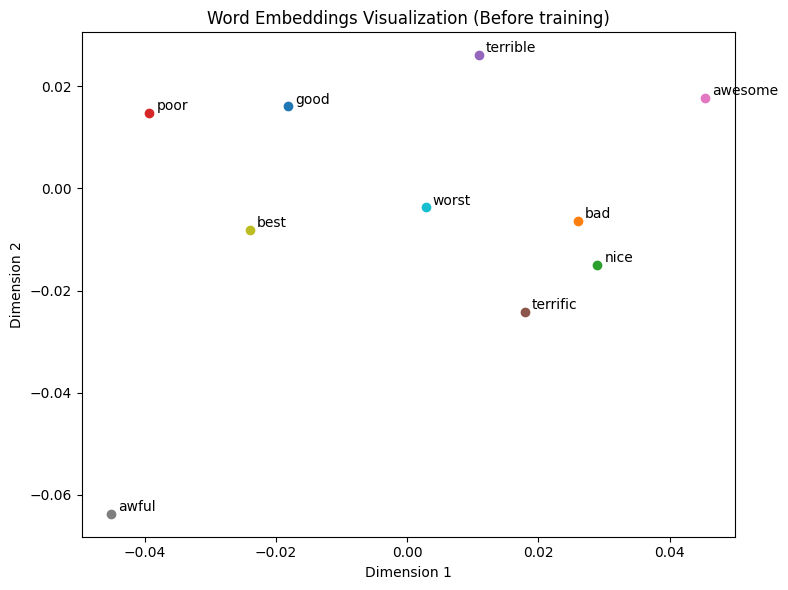

In [26]:
# Visualize the embeddings
plt.figure(figsize=(8, 6))
for word in test_words:
    if word != '':  # Skip the empty string token
        x, y = reduced_untrained_emb[vocab.index(word)]
        plt.scatter(x, y)
        plt.annotate(word, (x, y), xytext=(5, 2), textcoords='offset points')

plt.title("Word Embeddings Visualization (Before training)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.tight_layout()
plt.show()

### Train the model *(Switch to GPU runtime if needed)*

In [27]:
# Fit the model on train set
callbacks = [keras.callbacks.ModelCheckpoint("one_hot_dense.keras", save_best_only=True)]

# Change target shape from (None,) to (None, 1)
train_dataset = train_ds.map(lambda x, y: (x, tf.reshape(y, (-1,1))))                # Note that we are using 'train_ds' and not 'int_train_ds'
val_dataset = val_ds.map(lambda x, y: (x, tf.reshape(y, (-1,1))))

model.fit(train_dataset,
          validation_data = val_dataset,
          epochs = 20,
          callbacks = callbacks)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.5007 - loss: 0.6934 - val_accuracy: 0.5066 - val_loss: 0.6929
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.5071 - loss: 0.6930 - val_accuracy: 0.5112 - val_loss: 0.6923
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.5111 - loss: 0.6923 - val_accuracy: 0.5162 - val_loss: 0.6914
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.5163 - loss: 0.6916 - val_accuracy: 0.5177 - val_loss: 0.6906
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.5177 - loss: 0.6910 - val_accuracy: 0.5179 - val_loss: 0.6901
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.5167 - loss: 0.6905 - val_accuracy: 0.5197 - val_loss: 0.6896
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.5202 - loss: 0.6900 - val_accuracy: 0.5196 - val_loss: 0.6895
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.5197 - loss: 0.6897 - val_

In [28]:
## Load saved model
# model = keras.models.load_model("one_hot_dense.keras")

# Check model performance
test_dataset = test_ds.map(lambda x, y: (x, tf.reshape(y, (-1,1))))
print(f"Test acc: {model.evaluate(test_dataset)[1]:.3f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5164 - loss: 0.6898
Test acc: 0.516


From the above test accuracy, it can be seen that the model perfomance is not that well. It is expected as we are using only Dense layers.

Let's see if the embeddings learned during training were able to capture the semantic relationships between words.

In [29]:
# Get the embedding layer
trained_embedding_layer = model.get_layer('embedding')

# Get the embeddings
trained_embeddings = trained_embedding_layer.get_weights()[0]
trained_embeddings.shape

(20000, 256)

In [30]:
# Create a 2-dimensional PCA model of the word vectors using the scikit-learn PCA class
# n_components in PCA specifies the no.of dimensions
pca = PCA(n_components=2, random_state=42)

# Fit and transform the vectors using PCA model
reduced_trained_emb = pca.fit_transform(trained_embeddings)
reduced_trained_emb.shape

(20000, 2)

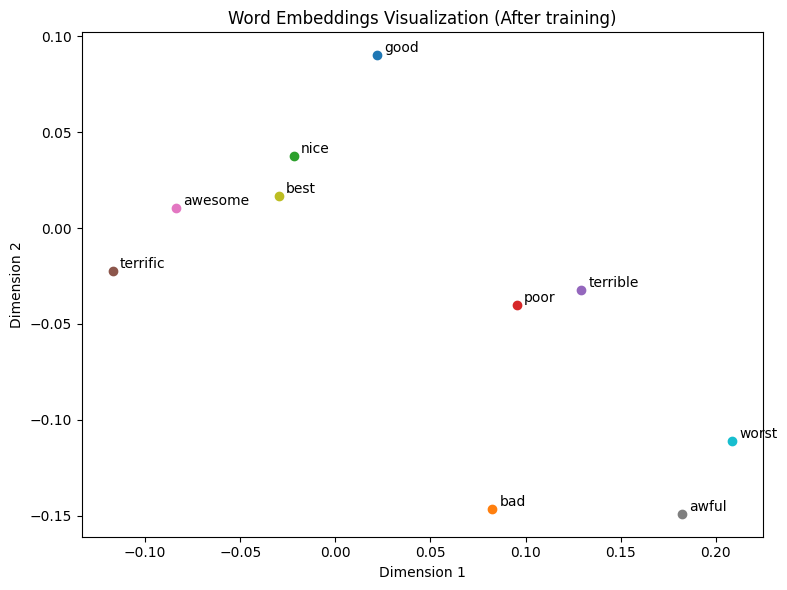

In [31]:
# Visualize the embeddings
plt.figure(figsize=(8, 6))
for word in test_words:
    if word != '':  # Skip the empty string token
        x, y = reduced_trained_emb[vocab.index(word)]
        plt.scatter(x, y)
        plt.annotate(word, (x, y), xytext=(5, 2), textcoords='offset points')

plt.title("Word Embeddings Visualization (After training)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.tight_layout()
plt.show()

From the above plot, it can be seen that good nice are more related, bad poor are more related, and so on.

### Please answer the questions below to complete the experiment:




In [32]:
#@title What is the primary purpose of word embeddings in natural language processing? { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "To convert words into numerical vectors" #@param ["", "To increase the size of text data", "To convert words into numerical vectors", "To identify grammatical errors", "To generate random text"]

In [33]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [34]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "na" #@param {type:"string"}


In [35]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [36]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [37]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [38]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 5778
Date of submission:  12 Aug 2024
Time of submission:  23:48:43
View your submissions: https://aimlops-iisc.talentsprint.com/notebook_submissions
